# Compute Spectrograms
Here we compute the Mel Spectrograms of the audio clips and save them to disk

In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import time

## Try on a single clip first

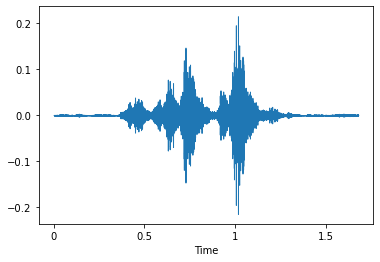

In [6]:
y, sr = librosa.load('../Data/Train_final/1001_DFA_SAD_XX.wav')
librosa.display.waveshow(y, sr=sr)

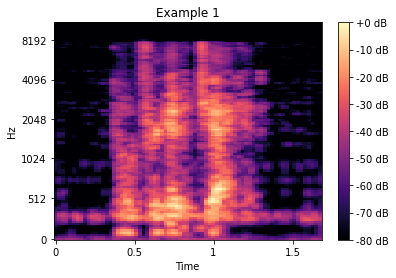

In [7]:
# These variables have default values, but we'll override them for the sake of the example
n_fft=2048
hop_length=512
n_mels=128

S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)

fig = plt.figure()
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');

plt.colorbar(format='%+2.0f dB');
plt.title('Example 1')
fig.savefig('MelSpectrogram example.png', bbox_inches='tight',
            facecolor='white', transparent=False)

## Now do it for all clips
**Note!** This is a long computation. It took 27 minutes in my laptop. You may not want to do this unless necessary.

### Input/output directory structure
We'll create spectrograms for audio clips in each folder of the form `prefix/folder_suffix` for each `folder` in the list `folders`. The output will be in folders called `prefix/Spectrogram_suffix/folder` for each `folder` in the list `folders`.

In [8]:
prefix  = '../Data'
folders = ['Train', 'Test']
suffix  = 'final'

# Create folders for the results
path_out = '%s/Spectrograms_%s' %(prefix, suffix)
if not os.path.isdir(path_out):
    os.mkdir(path_out)

for folder in folders:
    if not os.path.isdir('%s/%s' %(path_out, folder)):
        os.mkdir('%s/%s' %(path_out, folder))

Compute and save the spectrograms to disk.

In [9]:
plt.ioff()

# Create the spectrograms
for folder in folders:
    path = '%s/%s_%s' %(prefix, folder,suffix)
    files = os.listdir(path)

    time_start = time.time()
    for file_name in files:
        file_name = file_name.split('.')[0]
        y, sr = librosa.load('%s/%s.wav' %(path,file_name))

        S = librosa.feature.melspectrogram(y=y, sr=sr)
        S_DB = librosa.power_to_db(S, ref=np.max)

        fig = plt.figure()
        librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel');

        plt.colorbar(format='%+2.0f dB');
        plt.title(file_name.split('.')[0])
        fig.savefig('%s/Spectrograms_%s/%s/%s.png' %(prefix,suffix,folder,file_name),
                    bbox_inches='tight',
                    facecolor='white', transparent=False)
        plt.close()

    time_end = time.time()
    time_total = time_end-time_start

    print('Number of files in %s: %i' %(path, len(files)))
    if time_total <= 60:
        print('Duration: %f (s)' %time_total)
    elif 60 < time_total <= 3600:
        print('Duration: %f (min)' %(time_total/60))
    else:
        print('Duration: %f (h)' %(time_total/3600))

Number of files in ../Data/Train_final: 4876
Duration: 20.668778 (min)
Number of files in ../Data/Test_final: 1200
Duration: 5.139143 (min)


Note: Duration per number of files
- 10 files: 2.039712 (s)
- 100 files: 20.880895 (s)
- 7442 files: 27.423871 (min)